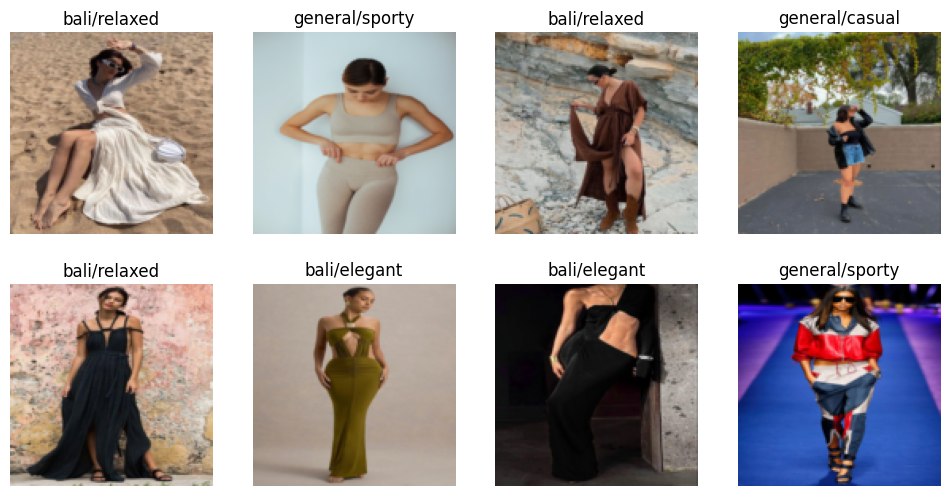

In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from nested_image_folder import NestedImageFolder

# 1. Define transforms
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # resize images
    transforms.ToTensor(),           # convert to tensor
    transforms.Normalize([0.485, 0.456, 0.406],  # ImageNet means
                         [0.229, 0.224, 0.225])  # ImageNet std devs
])

# 2. Load dataset from folder
dataset = NestedImageFolder(root='/Users/luizacomanescu/git/bali-style-net/dataset/', transform=transform)

# 3. Create DataLoader
loader = DataLoader(dataset, batch_size=16, shuffle=True)

# 4. Get a batch and show images with labels
def imshow(img):
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    plt.axis('off')

# Fetch one batch
images, labels = next(iter(loader))

# Plot
fig = plt.figure(figsize=(12, 6))
for i in range(8):
    ax = fig.add_subplot(2, 4, i+1)
    imshow(images[i])
    ax.set_title(dataset.classes[labels[i]])
    ax.axis('off')
plt.show()

In [ ]:
import numpy as np
print(np.__version__)

In [2]:
print(dataset.classes)

['bali/adventurous', 'bali/elegant', 'bali/relaxed', 'general/casual', 'general/chic', 'general/sporty']


In [3]:
# Confirm dataset balance

from collections import Counter

label_counts = Counter(dataset.targets)
for idx, count in label_counts.items():
    print(f"{dataset.classes[idx]}: {count} images")

bali/adventurous: 100 images
bali/elegant: 99 images
bali/relaxed: 99 images
general/casual: 100 images
general/chic: 100 images
general/sporty: 100 images
